In [2]:
import math

import pandas as pd
import numpy as np

df_students = pd.read_csv('C:/Users/Computer Parseh/Machine Learning/Student Performance 1402/data.csv',sep=';')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
df_students.isnull().values.any()

False

In [4]:
df_students["final_grade"] = (df_students["Curricular units 1st sem (grade)"] + df_students["Curricular units 2nd sem (grade)"]) / 2

In [5]:
# ============================== One Hot Encoding ======================
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse_output=False)
df_students_one_hot_label = pd.DataFrame(onehot_encoder.fit_transform(df_students[["Target"]]))
df_students_one_hot_label.columns = onehot_encoder.get_feature_names_out(['Target'])\


df_students_one_hot_label.head()

,Target_Dropout,Target_Enrolled,Target_Graduate
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [6]:
df_students_num = df_students.drop(['Target'],axis=1)
df_students_include_outliers = pd.concat([df_students_num,df_students_one_hot_label],axis=1)

df_students_include_outliers.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,final_grade,Target_Dropout,Target_Enrolled,Target_Graduate
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,0.000000,1.0,0.0,0.0
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,13.833333,0.0,0.0,1.0
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,0.000000,1.0,0.0,0.0
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,12.914286,0.0,0.0,1.0
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,12.666667,0.0,0.0,1.0


In [7]:
# ============================== Outlier Detection ======================

# Isolate Forest
# It can be handled both high-dimensional and low-dimensional data.
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(contamination=0.05)
isolation_forest.fit(df_students_num)
isolation_forest_outliers = isolation_forest.predict(df_students_num)
isolation_forest_outliers_indices = np.where(isolation_forest_outliers == -1)[0]

print("Isolation Forest Outlier Indices : ", *isolation_forest_outliers_indices)
print("Isolation Forest Outlier Count : ",len(isolation_forest_outliers_indices))

isolation_forest_outliers_rows = df_students_num.iloc[isolation_forest_outliers_indices]

df_students_final = df_students_include_outliers.drop(isolation_forest_outliers_indices)
df_students_one_hot_label = df_students_one_hot_label.drop(isolation_forest_outliers_indices)
df_students_num = df_students_num.drop(isolation_forest_outliers_indices)



Isolation Forest Outlier Indices :  103 166 180 241 262 277 346 375 467 524 533 534 560 595 599 657 669 671 679 689 691 693 707 715 717 724 728 738 747 755 757 760 764 840 845 872 891 894 961 1018 1065 1183 1193 1194 1206 1268 1302 1348 1382 1404 1435 1436 1441 1486 1506 1515 1542 1549 1550 1552 1572 1575 1593 1605 1633 1699 1724 1726 1729 1733 1749 1756 1761 1766 1801 1816 1828 1868 1878 1887 1894 1961 1992 1999 2031 2041 2056 2095 2247 2256 2270 2280 2307 2328 2329 2342 2351 2366 2372 2387 2391 2407 2417 2418 2436 2438 2447 2450 2451 2453 2475 2476 2486 2498 2502 2515 2550 2622 2639 2680 2755 2767 2778 2789 2793 2798 2835 2841 2843 2848 2852 2863 2866 2870 2873 2875 2876 2884 2900 2916 2918 2942 2953 2974 2975 2977 2988 2999 3030 3071 3074 3086 3093 3103 3125 3151 3182 3186 3241 3272 3275 3281 3282 3289 3317 3371 3381 3408 3437 3459 3472 3473 3476 3521 3535 3563 3566 3600 3635 3676 3686 3711 3728 3729 3760 3786 3808 3813 3817 3853 3874 3924 3943 3944 3961 3989 3990 4024 4062 4064 409

In [8]:
# the job categories that traditionally have more prestige, power, or higher income in many societies

# Mother's occupation & Father's occupation:
# 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers
# 2 - Specialists in Intellectual and Scientific Activities
# 10 - Armed Forces Professions


# Mother's occupation:
# 125 - Specialists in information and communication technologies (ICT)


# Father's occupation:
# 101 - Armed Forces Officers
# 102 - Armed Forces Sergeants
# 112 - Directors of administrative and commercial services
# 114 - Hotel, catering, trade and other services directors
# 121 - Specialists in the physical sciences, mathematics, engineering and related techniques
# 122 - Health professionals
# 124 - Specialists in finance, accounting, administrative organization, public and commercial relations


# Filter conditions
cond1 = (df_students_final["Mother's occupation"].isin([1, 2, 10])) & (df_students_final["Father's occupation"].isin([1, 2, 10]))
cond2 = (df_students_final["Mother's occupation"] == 125) | (df_students_final["Father's occupation"].isin([101, 102, 112, 114, 121,122, 124]))

# Filter dataframe
df_students_final_privileged_parent_occupations = df_students_final[cond1 | cond2]
df_students_final_not_privileged_parent_occupations = df_students_final[~cond1 & ~cond2]


print("Mother's occupation (Before) : ",np.array2string(df_students_final['Mother\'s occupation'].unique(),separator=', '))
print("Father's occupation (Before) :",np.array2string(df_students_final['Father\'s occupation'].unique(),separator=", "),"\n\n")


print("Mother's occupation (After) : ",np.array2string(df_students_final_privileged_parent_occupations['Mother\'s occupation'].unique(),separator=", "))
print("Father's occupation (After) :",np.array2string(df_students_final_privileged_parent_occupations['Father\'s occupation'].unique(),separator=", "))

df_students_final_privileged_parent_occupations.drop(['Mother\'s occupation', 'Father\'s occupation'], axis=1)



Mother's occupation (Before) :  [  5,   3,   9,   7,   4,   1, 125,   0,   6,   2,  90,   8, 141, 175,  99,
 191, 151, 194, 192, 132, 152, 134,  10, 143, 123, 173, 193, 122, 144, 131,
 171, 153]
Father's occupation (Before) : [  9,   3,   7,  10,   5,   8,   4,   1,   2, 124,   6,   0,  90, 175, 121,
  99, 144, 195, 192, 161, 193, 182, 132, 131, 194, 163, 135, 143, 171, 103,
 172, 152, 183, 102, 181, 134, 123, 112, 153, 174, 122, 141, 114, 151, 101,
 154] 


Mother's occupation (After) :  [  1, 125,   2, 175,  10, 191, 123, 134, 141, 193]
Father's occupation (After) : [  1,  10, 124,   2, 121, 102, 112, 122, 114, 101]


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,final_grade,Target_Dropout,Target_Enrolled,Target_Graduate
22,1,1,4,9500,1,1,142.0,1,19,19,125.5,1,0,0,1,0,0,18,0,0,8,12,7,12.857143,0,0,8,12,7,12.857143,0,12.7,3.7,-1.70,12.857143,0.0,0.0,1.0
29,1,17,2,9500,1,1,127.0,1,3,3,118.8,1,0,0,1,1,0,19,0,0,7,9,6,12.933333,0,0,7,7,6,13.716667,0,16.2,0.3,-0.92,13.325000,0.0,1.0,0.0
31,1,51,1,9070,1,1,125.0,1,42,3,130.0,1,0,0,1,1,0,20,0,2,6,7,6,12.833333,0,0,6,9,4,13.400000,0,8.9,1.4,3.51,13.116667,0.0,0.0,1.0
40,1,1,5,9773,1,1,126.0,1,3,3,121.1,0,0,1,1,0,0,18,0,0,6,6,4,12.750000,0,0,5,5,0,0.000000,0,12.7,3.7,-1.70,6.375000,1.0,0.0,0.0
42,1,1,6,9500,1,1,103.0,1,1,3,100.6,1,1,0,1,0,0,22,0,0,7,9,5,13.928000,0,0,8,9,7,14.342857,0,11.1,0.6,2.02,14.135429,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4230,2,43,1,9500,1,1,137.0,1,3,3,115.0,0,0,0,1,0,0,28,0,0,7,8,7,14.950000,0,0,8,8,8,14.737500,0,13.9,-0.3,0.79,14.843750,0.0,0.0,1.0
4243,1,1,1,9070,1,1,132.0,1,4,39,136.6,1,0,0,1,0,0,18,0,1,6,10,6,11.714286,1,0,6,15,6,10.375000,0,13.9,-0.3,0.79,11.044643,0.0,1.0,0.0
4285,1,1,5,9147,1,1,134.0,1,3,2,134.7,0,0,0,1,1,0,22,0,1,5,10,4,11.750000,0,0,5,10,3,11.000000,0,7.6,2.6,0.32,11.375000,0.0,1.0,0.0
4340,1,17,1,9085,1,1,120.0,1,2,3,116.1,0,0,0,1,0,0,20,0,0,5,12,3,11.666667,2,0,5,11,4,11.500000,1,9.4,-0.8,-3.12,11.583333,0.0,0.0,1.0


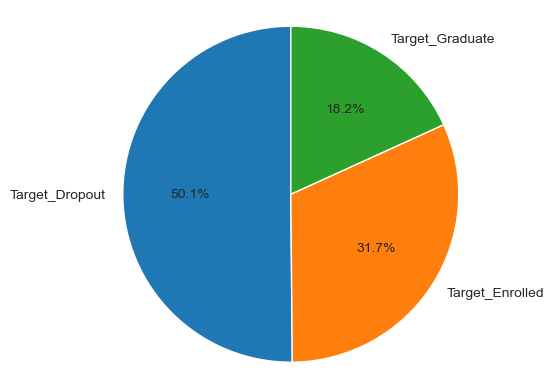

In [9]:
# A pie chart for the variety of labels in all situations
import matplotlib.pyplot as plt

plt.pie(df_students_one_hot_label.value_counts().values,labels=df_students_one_hot_label.columns,autopct='%1.1f%%',startangle=90)
plt.axis('equal')
plt.show()

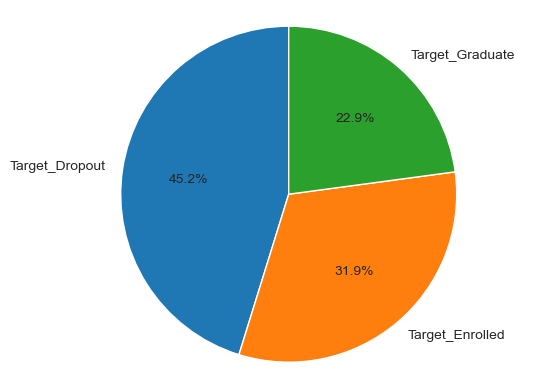

In [10]:
# A pie chart for the variety of labels in all cases of privileged parent occupations
plt.pie(df_students_final_privileged_parent_occupations[['Target_Dropout','Target_Enrolled','Target_Graduate']].value_counts().values,labels=df_students_final_privileged_parent_occupations[['Target_Dropout','Target_Enrolled','Target_Graduate']].columns,autopct='%1.1f%%',startangle=90)
plt.axis('equal')
plt.show()


In [11]:
# Description of grades before and after all students
df_students_final[['Previous qualification (grade)', 'Admission grade', 'final_grade']].apply(lambda x: x/10 if x.name in ['Previous qualification (grade)', 'Admission grade'] else x).describe()


,Previous qualification (grade),Admission grade,final_grade
count,4202.000000,4202.000000,4202.000000
mean,13.256133,12.681542,10.520998
std,1.300296,1.425055,4.750238
min,9.500000,9.500000,0.000000
25%,12.500000,11.780000,11.000000
50%,13.310000,12.600000,12.269048
75%,14.000000,13.450000,13.295965
max,19.000000,19.000000,18.283654


In [12]:
# Description of the before and after scores of students whose parents' jobs have higher prestige, power or income
df_students_final_privileged_parent_occupations[['Previous qualification (grade)', 'Admission grade', 'final_grade']].apply(lambda x: x/10 if x.name in ['Previous qualification (grade)', 'Admission grade'] else x).describe()


,Previous qualification (grade),Admission grade,final_grade
count,188.000000,188.000000,188.000000
mean,13.563830,13.026596,10.656105
std,1.491368,1.641064,4.963428
min,10.000000,9.700000,0.000000
25%,12.575000,11.877500,11.033482
50%,13.500000,12.960000,12.495833
75%,14.300000,14.000000,13.504167
max,19.000000,19.000000,16.793889


In [13]:

df_students_final_privileged_parent_occupations_low_priority_lessons = df_students_final_privileged_parent_occupations[df_students_final_privileged_parent_occupations["Application order"].between(6, 9)]

print("Application order (df_students_final) :",np.sort(np.array(df_students_final['Application order'].unique())))

print("Application order (privileged_parent_occupations) :",np.sort(np.array(df_students_final_privileged_parent_occupations['Application order'].unique())))

print("Application order (privileged_parent_occupations_low_priority_lessons) :",np.sort(np.array(df_students_final_privileged_parent_occupations_low_priority_lessons['Application order'].unique())))



Application order (df_students_final) : [1 2 3 4 5 6 9]
Application order (privileged_parent_occupations) : [1 2 3 4 5 6]
Application order (privileged_parent_occupations_low_priority_lessons) : [6]


In [14]:
# Description of the before and after scores of students who have a low priority lessons and whose parents' occupations have higher credit, power or income

df_students_final_privileged_parent_occupations_low_priority_lessons[['Previous qualification (grade)', 'Admission grade', 'final_grade']].apply(lambda x: x/10 if x.name in ['Previous qualification (grade)', 'Admission grade'] else x).describe()


,Previous qualification (grade),Admission grade,final_grade
count,8.000000,8.00000,8.000000
mean,13.237500,12.19750,13.199055
std,1.936077,1.34502,1.028334
min,10.200000,10.06000,11.066667
25%,12.550000,11.76750,12.909375
50%,13.950000,12.64500,13.173090
75%,14.325000,13.02250,13.978143
max,15.100000,13.63000,14.314286


In [15]:
# Description of before and after grades of students whose previous grades were bad, had a low priority in their studies, and whose parents' occupations have higher prestige, power, or income.

df_students_final_privileged_parent_occupations_low_priority_lessons_low_previous_grade = df_students_final_privileged_parent_occupations_low_priority_lessons[df_students_final_privileged_parent_occupations_low_priority_lessons["Previous qualification (grade)"].between(0, 130)]

df_students_final_privileged_parent_occupations_low_priority_lessons_low_previous_grade[['Previous qualification (grade)', 'Admission grade', 'final_grade']].apply(lambda x: x/10 if x.name in ['Previous qualification (grade)', 'Admission grade'] else x).describe()


,Previous qualification (grade),Admission grade,final_grade
count,2.000000,2.000000,2.000000
mean,10.250000,10.115000,13.526048
std,0.070711,0.077782,0.861795
min,10.200000,10.060000,12.916667
25%,10.225000,10.087500,13.221357
50%,10.250000,10.115000,13.526048
75%,10.275000,10.142500,13.830738
max,10.300000,10.170000,14.135429


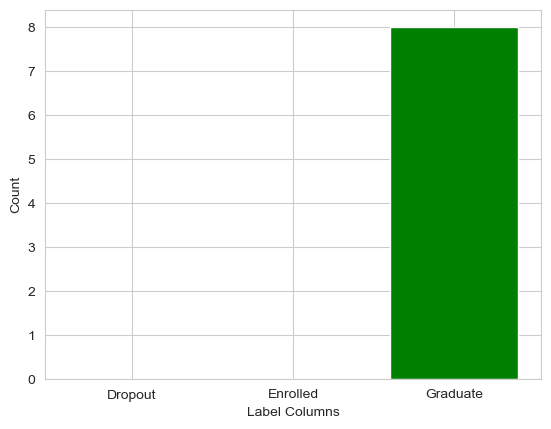

In [16]:
# Number of labels df_students_final_privileged_parent_occupations_low_priority_lessons

labels = ['Dropout', 'Enrolled', 'Graduate']
counts = [(df_students_final_privileged_parent_occupations_low_priority_lessons['Target_Dropout'] == 1).sum(),
          (df_students_final_privileged_parent_occupations_low_priority_lessons['Target_Enrolled'] == 1).sum(),
          (df_students_final_privileged_parent_occupations_low_priority_lessons['Target_Graduate'] == 1).sum()]


plt.bar(labels, counts,color=['red', 'orange', 'green'])
plt.xlabel('Label Columns')
plt.ylabel('Count')
plt.show()

C:\anaconda\envs\student_performance_1402\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda\envs\student_performance_1402\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda\envs\student_performance_1402\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


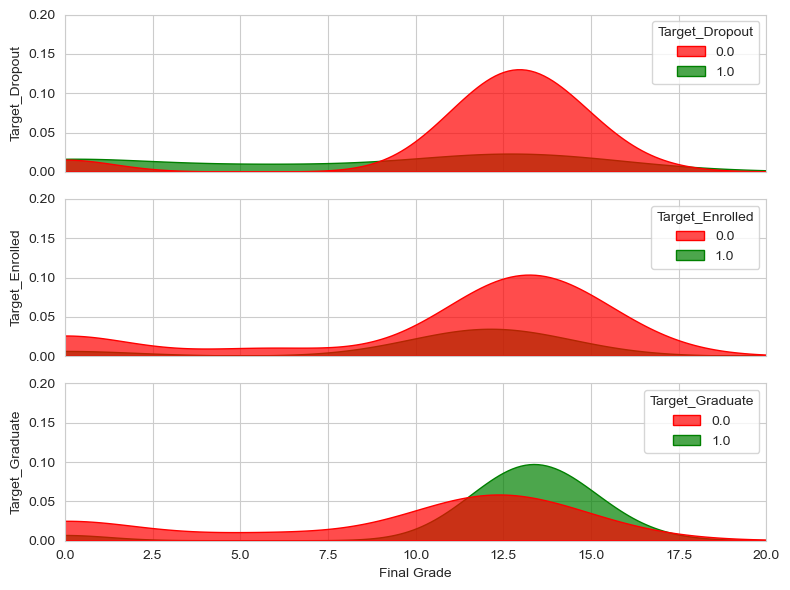

In [17]:
import seaborn as sns


# Create subplots
fig, axes = plt.subplots(nrows=len(['Target_Dropout', 'Target_Enrolled', 'Target_Graduate']), ncols=1, figsize=(8, 6), sharex=True)

# Iterate over the columns
for i, column in enumerate(['Target_Dropout', 'Target_Enrolled', 'Target_Graduate']):
    # Plot the Ridge plot for each column
    sns.kdeplot(data=df_students_final_privileged_parent_occupations, x='final_grade', hue=column, ax=axes[i], fill=True, alpha=0.7, palette=['red','green'])
    axes[i].set(ylabel=column)

    axes[i].set_ylim(0,0.20)
    axes[i].set_xlim(0,20)

# Set the x-axis label
axes[-1].set(xlabel='Final Grade')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [18]:
df_students_final.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [19]:
# If the probability of privileged in each total row is 0.044 and the independent random variable is considered, what is the probability of getting 2 privileged out of 5 total rows?

import math

# Define the probability of being privileged in each row
p = len(df_students_final_privileged_parent_occupations)/len(df_students_final)
n = 5

# Calculate the probability of getting exactly k successes (privileged rows)
k = 2

prob_two_of_five_privileged = math.comb(n, k) * (p**k) * ((1-p)**(n-k))

print("Probability of getting",k ,"privileged out of",n ,"total rows:", "{:.2f}%".format(prob_two_of_five_privileged))

Probability of getting 2 privileged out of 5 total rows: 0.02%


The data does not follow a normal distribution.


C:\anaconda\envs\student_performance_1402\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


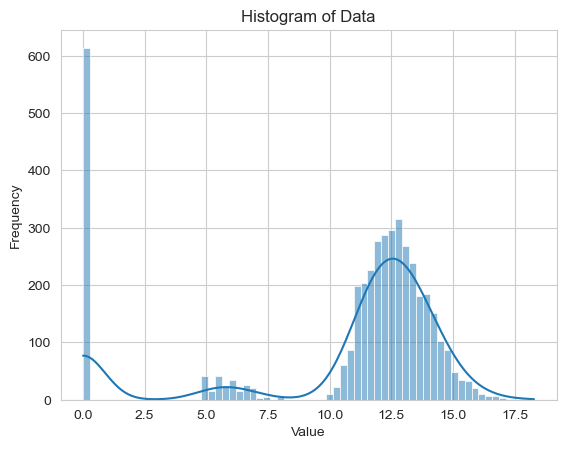

In [20]:
from scipy import stats

# Perform the Shapiro-Wilk test for normality
shapiro, p_value = stats.shapiro(df_students_final['final_grade'])
if p_value > 0.05:
    print("The data follows a normal distribution.")
else:
    print("The data does not follow a normal distribution.")

# Plot the histogram of the data
sns.histplot(data=df_students_final, x='final_grade', kde=True)
plt.title('Histogram of Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [21]:
# 95% and 99% confidence intervals for 60 random samples by calculating the mean and standard deviation of the population

# Generate random sample data
np.random.seed(42)  # For reproducibility
sample_data = np.random.choice(a=df_students_final['final_grade'], size=100)

# Calculate the average
average_final_grade = np.mean(sample_data)

# Calculate the population standard deviation
pop_std = np.std(sample_data, ddof=1)  # Using ddof=1 for sample standard deviation

# Calculate the standard error of the mean
sem = pop_std / np.sqrt(len(sample_data))

# Calculate the 95% confidence interval
conf_interval_95 = stats.t.interval(0.95, len(sample_data) - 1, loc=average_final_grade, scale=sem)
conf_interval_99 = stats.t.interval(0.99, len(sample_data) - 1, loc=average_final_grade, scale=sem)

# Print the results
print(f"Average Final Grade: {average_final_grade:.2f}")
print(f"Population Standard Deviation: {pop_std:.2f}")
print(f"95% Confidence Interval: ({conf_interval_95[0]:.2f}, {conf_interval_95[1]:.2f})")
print(f"99% Confidence Interval: ({conf_interval_99[0]:.2f}, {conf_interval_99[1]:.2f})")

Average Final Grade: 9.98
Population Standard Deviation: 5.23
95% Confidence Interval: (8.95, 11.02)
99% Confidence Interval: (8.61, 11.36)


In [22]:
# 95% and 99% confidence intervals for 60 random samples from privileged_parent_occupations by calculating the mean and standard deviation of the population

# Generate random sample data
np.random.seed(42)  # For reproducibility
sample_data = np.random.choice(a=df_students_final_privileged_parent_occupations['final_grade'], size=100)

# Calculate the average
average_final_grade = np.mean(sample_data)

# Calculate the population standard deviation
pop_std = np.std(sample_data, ddof=1)  # Using ddof=1 for sample standard deviation

# Calculate the standard error of the mean
sem = pop_std / np.sqrt(len(sample_data))

# Calculate the 95% confidence interval
conf_interval_95 = stats.t.interval(0.95, len(sample_data) - 1, loc=average_final_grade, scale=sem)
conf_interval_99 = stats.t.interval(0.99, len(sample_data) - 1, loc=average_final_grade, scale=sem)

# Print the results
print(f"Average Final Grade: {average_final_grade:.2f}")
print(f"Population Standard Deviation: {pop_std:.2f}")
print(f"95% Confidence Interval: ({conf_interval_95[0]:.2f}, {conf_interval_95[1]:.2f})")
print(f"99% Confidence Interval: ({conf_interval_99[0]:.2f}, {conf_interval_99[1]:.2f})")

Average Final Grade: 11.01
Population Standard Deviation: 4.88
95% Confidence Interval: (10.04, 11.98)
99% Confidence Interval: (9.73, 12.29)


In [23]:
# 90% confidence intervals for 60 random samples by calculating the mean and standard deviation of the population

# Generate random sample data for monthly rent of one-bedroom apartments
np.random.seed(42)  # For reproducibility
sample_data = np.random.choice(a=df_students_final['final_grade'], size=100)

# Number of bootstrap samples
num_samples = 50

# Bootstrap resampling
bootstrap_means = []
for _ in range(num_samples):
    bootstrap_sample = np.random.choice(sample_data, size=len(sample_data), replace=True)
    bootstrap_mean = np.mean(bootstrap_sample)
    bootstrap_means.append(bootstrap_mean)

# Calculate the average monthly rent using bootstrap
bootstrap_average_final_grade = np.mean(bootstrap_means)

# Calculate the standard deviation of the bootstrap means
bootstrap_std = np.std(bootstrap_means, ddof=1)

# Calculate the 90% confidence interval using the bootstrap results
conf_interval_bootstrap = np.percentile(bootstrap_means, [5, 95])

# Print the results
print(f"Average Final Grade using Bootstrap: {bootstrap_average_final_grade:.2f}")
print(f"Bootstrap Standard Deviation: {bootstrap_std:.2f}")
print(f"Bootstrap 90% Confidence Interval: ({conf_interval_bootstrap[0]:.2f}, {conf_interval_bootstrap[1]:.2f})")

Average Final Grade using Bootstrap: 10.13
Bootstrap Standard Deviation: 0.50
Bootstrap 90% Confidence Interval: (9.22, 10.90)


In [24]:
# 90% confidence intervals for 60 random samples by calculating the mean and standard deviation of the population

# Generate random sample data for monthly rent of one-bedroom apartments
np.random.seed(42)  # For reproducibility
sample_data = np.random.choice(a=df_students_final_privileged_parent_occupations['final_grade'], size=100)

# Number of bootstrap samples
num_samples = 50

# Bootstrap resampling
bootstrap_means = []
for _ in range(num_samples):
    bootstrap_sample = np.random.choice(sample_data, size=len(sample_data), replace=True)
    bootstrap_mean = np.mean(bootstrap_sample)
    bootstrap_means.append(bootstrap_mean)

# Calculate the average monthly rent using bootstrap
bootstrap_average_final_grade = np.mean(bootstrap_means)

# Calculate the standard deviation of the bootstrap means
bootstrap_std = np.std(bootstrap_means, ddof=1)

# Calculate the 90% confidence interval using the bootstrap results
conf_interval_bootstrap = np.percentile(bootstrap_means, [5, 95])

# Print the results
print(f"Average Final Grade using Bootstrap: {bootstrap_average_final_grade:.2f}")
print(f"Bootstrap Standard Deviation: {bootstrap_std:.2f}")
print(f"Bootstrap 90% Confidence Interval: ({conf_interval_bootstrap[0]:.2f}, {conf_interval_bootstrap[1]:.2f})")

Average Final Grade using Bootstrap: 10.95
Bootstrap Standard Deviation: 0.49
Bootstrap 90% Confidence Interval: (10.13, 11.64)


In [25]:
# testing the hypothesis using a One-Sample t Test for the Mean and a One-Sample z Test

# Null Hypothesis (H0): There is no discrimination against children of parents with higher prestige, power, or income in passing courses and graduating.
# Alternative Hypothesis (H1): Children of privileged parents face discrimination in passing courses and graduating.
# Significance Level : α = 0.05

from scipy.stats import zscore, norm


# Calculate the mean of the final grades for children of privileged parents
privileged_mean = df_students_final_privileged_parent_occupations['final_grade'].mean()
final_grades = df_students_final_privileged_parent_occupations['final_grade']

# Perform the One-Sample Test for the Mean
from scipy.stats import ttest_1samp

# Perform a one-sample t-test to compare the mean final grade with the mean of privileged parents
t_stat, p_value = ttest_1samp(final_grades, privileged_mean)

# Set the confidence level
confidence_level = 0.95
alpha = 1 - confidence_level

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("One-Sample t Test for the Mean : \t Reject the null hypothesis: There is evidence of discrimination.")
else:
    print("One-Sample t Test for the Mean : \t Fail to reject the null hypothesis: No evidence of discrimination.")

# Perform the One-Sample Z Test
# Calculate the z-score of the final grades
final_grades_zscore = zscore(final_grades)

# Calculate the z-score for the mean of privileged parents
privileged_mean_zscore = (privileged_mean - final_grades.mean()) / final_grades.std()

# Calculate the standard error of the mean final grades
std_error = final_grades.std() / (len(final_grades) ** 0.5)

# Calculate the z-score for the One-Sample z Test
z_score = (privileged_mean - final_grades.mean()) / std_error

# Determine the p-value
p_value_z = 2 * (1 - norm.cdf(abs(z_score)))

# Check the p-value against the significance level
if p_value_z < alpha:
    print("One-Sample Z Test : \t\t\t Reject the null hypothesis: There is evidence of discrimination.")
else:
    print("One-Sample Z Test : \t\t\t Fail to reject the null hypothesis: No evidence of discrimination.")

One-Sample t Test for the Mean : 	 Fail to reject the null hypothesis: No evidence of discrimination.
One-Sample Z Test : 			 Fail to reject the null hypothesis: No evidence of discrimination.


In [26]:

from scipy import stats

t_test = stats.ttest_ind(df_students_final_privileged_parent_occupations["final_grade"], df_students_final["final_grade"])
print(f"t-test statistic: {t_test.statistic}")
print(f"p-value: {t_test.pvalue}")


# Calculate the mean and standard deviation for both groups
privileged_mean = df_students_final_privileged_parent_occupations["final_grade"].mean()
privileged_std = df_students_final_privileged_parent_occupations["final_grade"].std()
control_mean = df_students_final["final_grade"].mean()
control_std = df_students_final["final_grade"].std()

# Calculate the pooled standard deviation
pooled_std = np.sqrt(((len(df_students_final_privileged_parent_occupations) - 1) * privileged_std**2 + (len(df_students_final) - 1) * control_std**2) / (len(df_students_final_privileged_parent_occupations) + len(df_students_final) - 2))

# Calculate the z-score statistic
z_score = (privileged_mean - control_mean) / pooled_std

# Calculate the p-value using the standard normal cumulative distribution function (cdf)
p_value = 1 - stats.norm.cdf(z_score)

# Print the results
print(f"z-score statistic: {z_score}")
print(f"p-value: {p_value}")



t-test statistic: 0.3807957475258339
p-value: 0.7033732486128641
z-score statistic: 0.028386862966915716
p-value: 0.4886768009069936


In [27]:
from statsmodels.stats.power import zt_ind_solve_power

sample_data = df_students_final_privileged_parent_occupations['final_grade']
population_mean = df_students_final['final_grade'].mean()

# Specify the effect size you want to detect
effect_size = 0.3 # Determine the effect size

sample_mean = sample_data.mean()
effect_size = (sample_mean - population_mean) / sample_data.std()

# Effect Size is mistake *****************************************************************************************************************
#effect_size = 0.5

print(f"effect_size : {effect_size:.2f}")


# Calculate power
power = zt_ind_solve_power(effect_size=effect_size, nobs1=len(sample_data), alpha=0.05, alternative='larger')
print(f"Power of the test: {power:.2f}")

effect_size : 0.03
Power of the test: 0.08


In [28]:
# Required sample size for 80% POWER

from statsmodels.stats.power import TTestIndPower

# Parameters for sample size calculation
#effect_size = 0.25  # expected effect size
alpha = 0.05  # significance level
power = 0.8  # desired power

# Initialize the TTestIndPower class
power_analysis = TTestIndPower()

# Calculate the sample size for a one-sample t-test
sample_size = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='larger')

print(f"Required sample size: {sample_size} -> {math.ceil(sample_size)}")


Required sample size: 16688.542798604223 -> 16689


In [29]:
# Required sample size based on Confidence Interval for 80% POWER

from statsmodels.stats.proportion import samplesize_confint_proportion

# Parameters for sample size calculation
alpha = 0.05  # significance level
margin_of_error = 0.1  # desired margin of error
p = 0.5  # estimated proportion (use 0.5 for maximum variance)

# Calculate the required sample size
sample_size = samplesize_confint_proportion(p, margin_of_error, alpha=alpha)

print(f"Required sample size: {sample_size} -> {math.ceil(sample_size)}")

Required sample size: 96.03647051735317 -> 97


In [30]:
# x^2

from scipy.stats import chi2

# Consider the column for analysis
column_to_test = 'final_grade'

# Subset the data for children of privileged parents
privileged_data = df_students_final_privileged_parent_occupations[column_to_test]

# Calculate sample variance and degrees of freedom
sample_variance = np.var(privileged_data, ddof=1)
n = len(privileged_data)
dof = n - 1

# Set the null hypothesis: The final grades have the same variance as a normal distribution
null_variance = 1.0  # Adjust this value according to your hypothesis

# Calculate the test statistic
test_statistic = (n - 1) * sample_variance / null_variance

# Calculate the critical value for a significance level of 0.05 (for example)
alpha = 0.05
critical_value = chi2.ppf(1 - alpha, dof)

# Compare the test statistic with the critical value
p_value = 1 - chi2.cdf(test_statistic, dof)

# Print the results
print(f"Test statistic: {test_statistic}")
print(f"Critical value: {critical_value}")
print(f"P-value: {p_value}")

if test_statistic > critical_value:
    print("Reject the null hypothesis: Variance is significantly different from the expected variance.")
else:
    print("Fail to reject the null hypothesis: Variance is not significantly different from the expected variance.")


# Limitations of the Data:

#The variable df_students_final_privileged_parent_occupations likely represents socioeconomic groups rather than individual prestige, power, or income. Analyzing individual scores within subgroups can be complex due to potential confounding factors within each group.
#Using grades based on chosen subjects with the lowest priority may introduce bias, as these grades might not accurately reflect academic ability.
#Discrimination is a complex issue influenced by various factors beyond grades, requiring more advanced data and qualitative analysis.

#Limitations of the Statistical Methods:
#One-Sample χ² Test for Variance: This test compares the variance of a single sample to a hypothesized variance, not suitable for comparing differences in variance between two groups.

Test statistic: 4606.860724640012
Critical value: 219.90577029661532
P-value: 0.0
Reject the null hypothesis: Variance is significantly different from the expected variance.


In [31]:
# Testing for the Equality of Two Variances

# H0 (Null Hypothesis): The variances of the final grades of students from privileged parent occupations are equal to the variances of the final grades of students from non-privileged parent occupations.
# Mathematically: σ²_privileged = σ²_non_privileged

# H1 (Alternative Hypothesis): The variances of the final grades of students from privileged parent occupations are not equal to the variances of the final grades of students from non-privileged parent occupations.
# Mathematically: σ²_privileged ≠ σ²_non_privileged


from scipy.stats import f, t, ttest_ind

# Consider the final grade column for analysis
privileged_data = df_students_final_privileged_parent_occupations['final_grade']
non_privileged_data = df_students_final_not_privileged_parent_occupations['final_grade']

# Testing the equality of variances
var_privileged = np.var(privileged_data, ddof=1)
var_non_privileged = np.var(non_privileged_data, ddof=1)

F_statistic = var_privileged / var_non_privileged
df1 = len(privileged_data) - 1
df2 = len(non_privileged_data) - 1

# Calculate the critical F-value for a significance level of 0.05
F_critical = f.ppf(0.975, df1, df2)
p_value_var = 2 * (1 - f.cdf(F_statistic, df1, df2))

if F_statistic > F_critical:
    print("Reject the null hypothesis: Variances are significantly different.")
else:
    print("Fail to reject the null hypothesis: Variances are not significantly different.")
print(f"F-statistic: {F_statistic:.2f}")
print(f"P-value for variance test: {p_value_var:.2f}")


Fail to reject the null hypothesis: Variances are not significantly different.
F-statistic: 1.10
P-value for variance test: 0.36


C:\anaconda\envs\student_performance_1402\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
C:\anaconda\envs\student_performance_1402\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
C:\anaconda\envs\student_performance_1402\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


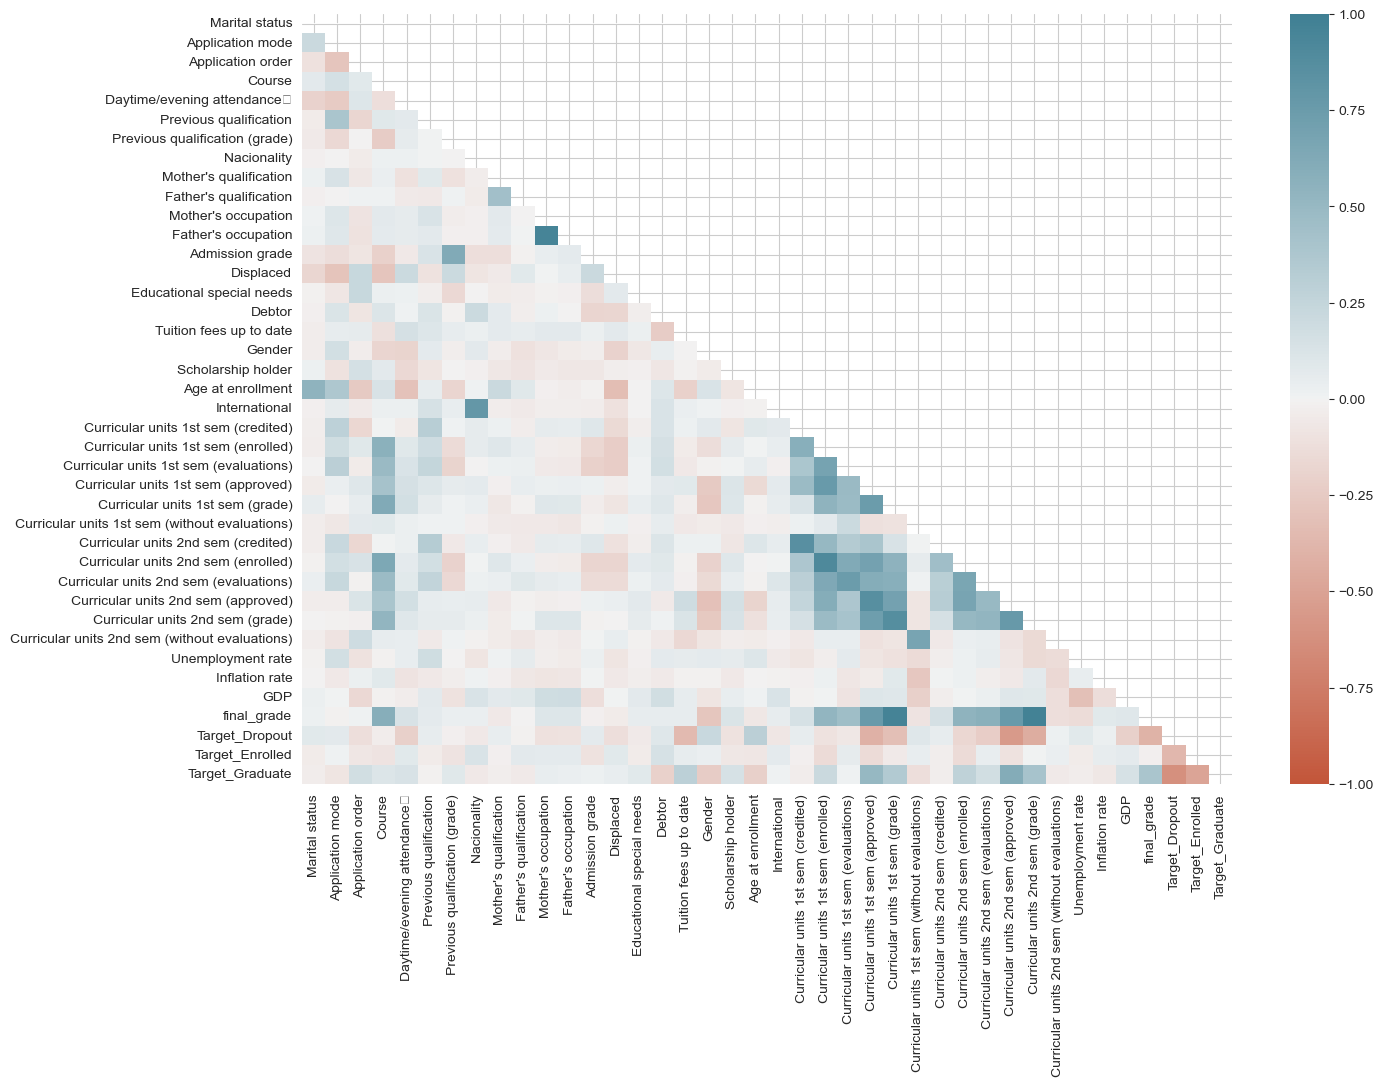

In [52]:
# Correlation
plt.figure(figsize=(15, 10))

corr_mat = df_students_final_privileged_parent_occupations.corr()
mask= np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_mat,
            vmax=1, vmin=-1,
            annot=True, annot_kws={'fontsize':7},
            mask=mask,
            cmap=sns.diverging_palette(20,220,as_cmap=True))
plt.show()

In [33]:
corr_mat["Target_Graduate"].sort_values(ascending=False)

Target_Graduate                                   1.000000
Curricular units 2nd sem (approved)               0.608510
Curricular units 1st sem (approved)               0.504152
Curricular units 2nd sem (grade)                  0.409478
final_grade                                       0.394078
Curricular units 1st sem (grade)                  0.349385
Tuition fees up to date                           0.295599
Curricular units 2nd sem (enrolled)               0.274492
Curricular units 1st sem (enrolled)               0.217832
Application order                                 0.178086
Curricular units 2nd sem (evaluations)            0.175260
GDP                                               0.147160
Scholarship holder                                0.146715
Daytime/evening attendance\t                      0.135394
Course                                            0.109487
Previous qualification (grade)                    0.093297
Educational special needs                         0.0804

In [34]:
corr_mat["Target_Dropout"].sort_values(ascending=False)


Target_Dropout                                    1.000000
Age at enrollment                                 0.300101
Gender                                            0.226184
Debtor                                            0.096853
Curricular units 1st sem (without evaluations)    0.095567
Unemployment rate                                 0.082660
Marital status                                    0.079295
Application mode                                  0.071408
Admission grade                                   0.064241
Previous qualification                            0.054263
Curricular units 2nd sem (credited)               0.051146
Curricular units 1st sem (credited)               0.049373
Mother's qualification                            0.041404
Inflation rate                                    0.024871
Curricular units 2nd sem (without evaluations)    0.020048
Father's qualification                           -0.012857
Previous qualification (grade)                   -0.0182

<Axes: xlabel='Target_Graduate', ylabel='final_grade'>

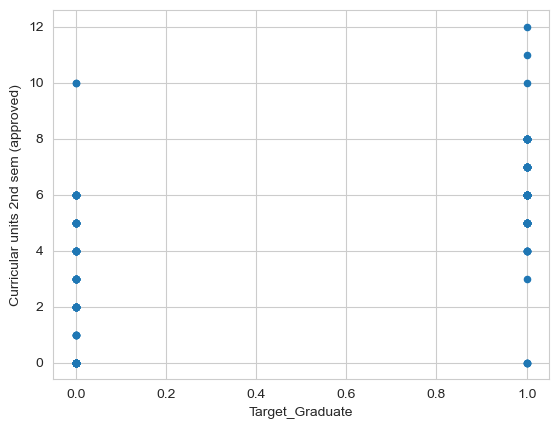

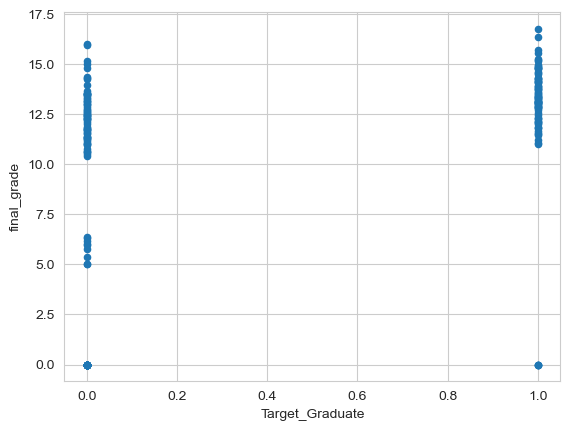

In [35]:
df_students_final_privileged_parent_occupations.plot.scatter(x='Target_Graduate',y='Curricular units 2nd sem (approved)')
df_students_final_privileged_parent_occupations.plot.scatter(x='Target_Graduate',y='final_grade')

<Axes: xlabel='Target_Dropout', ylabel='Gender'>

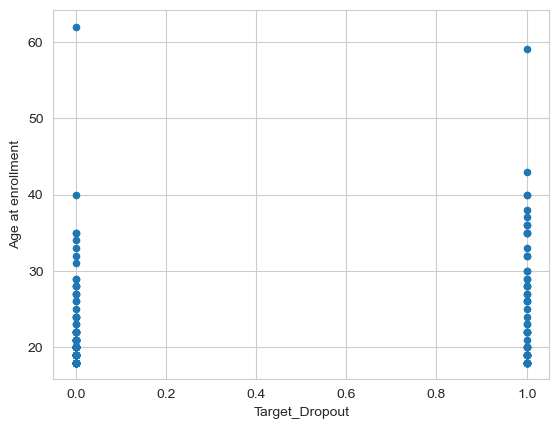

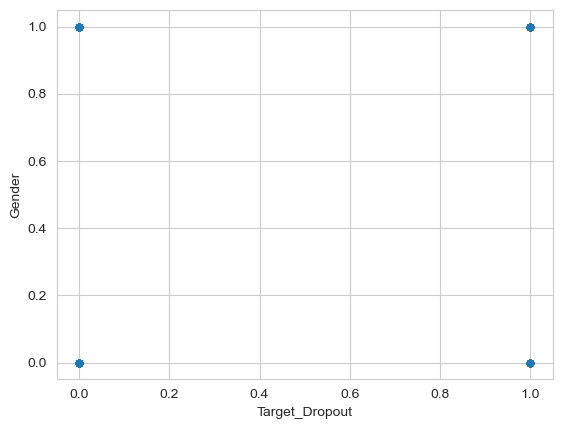

In [36]:
df_students_final_privileged_parent_occupations.plot.scatter(x='Target_Dropout',y='Age at enrollment')
df_students_final_privileged_parent_occupations.plot.scatter(x='Target_Dropout',y='Gender')

In [37]:

# Regression Formula for 'Target_Dropout' and 'Age at enrollment'

X = df_students_final_privileged_parent_occupations['Target_Dropout'].values
Y = df_students_final_privileged_parent_occupations['Age at enrollment'].values

# Calculate the slope (a) and intercept (b) using numpy's polyfit function
a, b = np.polyfit(X, Y, 1)

# Print the regression formula
print(f"Y = {a:.2f} X + {b:.2f}")

Y = 4.40 X + 21.30


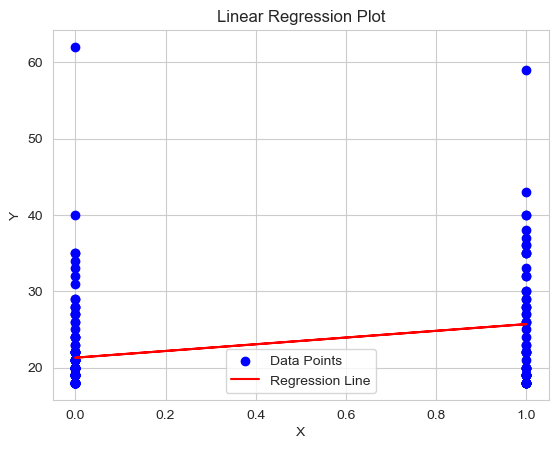

In [38]:

# Create a scatter plot for the data points
plt.scatter(df_students_final_privileged_parent_occupations['Target_Dropout'].values,
            df_students_final_privileged_parent_occupations['Age at enrollment'].values,
            color='blue',
            label='Data Points')

# Plot the linear regression line
plt.plot(X, a*X + b, color='red', label='Regression Line')

# Add labels and a legend to the plot
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Plot')
plt.legend()

# Display the plot
plt.show()

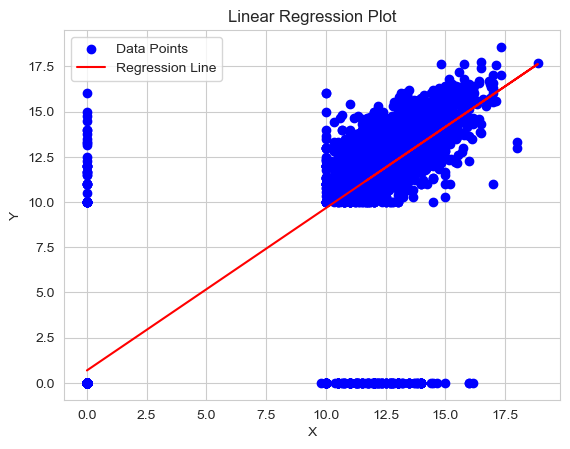

In [39]:
# Testing the correctness of code performance in the regression formula section

X = df_students_final['Curricular units 1st sem (grade)'].values
Y = df_students_final['Curricular units 2nd sem (grade)'].values

# Calculate the slope (m) and intercept (b) using numpy's polyfit function
m, b = np.polyfit(X, Y, 1)

# Create a scatter plot for the data points
plt.scatter(X, Y, color='blue', label='Data Points')

# Plot the linear regression line
plt.plot(X, m*X + b, color='red', label='Regression Line')

# Add labels and a legend to the plot
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Plot')
plt.legend()

# Display the plot
plt.show()

In [40]:
# F-Test for Simple Linear Regression

# Null Hypothesis (H0): The coefficient of 'Age at enrollment' in predicting 'Target_Dropout' is not significantly different from zero.
# Alternative Hypothesis (H1): The coefficient of 'Age at enrollment' in predicting 'Target_Dropout' is significantly different from zero.

import numpy as np
import scipy.stats as stats

# Provided regression formula: Y = 3.77X + 21.46
slope = 3.77
intercept = 21.46

# Full model prediction
y_predicted_full = slope * df_students_final_privileged_parent_occupations['Age at enrollment'] + intercept

# Calculate the residuals (errors) for the full model
residuals_full = df_students_final_privileged_parent_occupations['Target_Dropout'] - y_predicted_full

# Calculate the sum of squared errors (SSE) for the full model
SSE_full = np.sum(residuals_full**2)

# Reduced model is the model without the predictor variable, so SSE is calculated without the predictor
mean_y = np.mean(df_students_final_privileged_parent_occupations['Target_Dropout'])
SSE_reduced = np.sum((df_students_final_privileged_parent_occupations['Target_Dropout'] - mean_y)**2)

# Calculate the degrees of freedom
n = len(df_students_final_privileged_parent_occupations)
df_reg = 1  # Degrees of freedom for the regression
df_resid = n - 2  # Degrees of freedom for the residuals

# Calculate the F-statistic
F_statistic = ((SSE_reduced - SSE_full) / df_reg) / (SSE_full / df_resid)

# Define the significance level (alpha)
alpha = 0.05

# Calculate the critical F-value from the F-distribution at a significance level of alpha
critical_F_value = stats.f.ppf(1 - alpha, df_reg, df_resid)

# Print the F-statistic and critical F-value
print(f"F-statistic: {F_statistic:.2f}")
print(f"Critical F-value: {critical_F_value:.2f}")

# Compare the F-statistic with the critical F-value to determine statistical significance
if F_statistic > critical_F_value:
    print("Reject the null hypothesis. The coefficient of 'Age at enrollment' is significant in predicting 'Target_Dropout'.")
else:
    print("Fail to reject the null hypothesis. The coefficient of 'Age at enrollment' is not significant in predicting 'Target_Dropout'.")

F-statistic: -186.00
Critical F-value: 3.89
Fail to reject the null hypothesis. The coefficient of 'Age at enrollment' is not significant in predicting 'Target_Dropout'.


In [41]:

import statsmodels.stats.power as smp # Statistical power

# Calculating the correlation coefficient between 'Target_Dropout' and 'final_grade'
correlation_coefficient = df_students_final_privileged_parent_occupations['Target_Dropout'].corr(df_students_final_privileged_parent_occupations['final_grade'])

# Fisher's z transformation
fisher_z = np.arctan(correlation_coefficient)

# One-sample t-test
t_statistic, p_value_t = ttest_1samp(fisher_z, 0)

# One-sample z-test
z_statistic = fisher_z / (1 / np.sqrt(df_students_final_privileged_parent_occupations.shape[0] - 3))
p_value_z = norm.cdf(z_statistic)

# Power and Sample Size Calculation
effect_size = np.abs(fisher_z)
alpha = 0.05
power_t = smp.TTestPower().power(effect_size=effect_size, nobs=df_students_final_privileged_parent_occupations.shape[0], alpha=alpha, alternative='two-sided')
power_z = smp.zt_ind_solve_power(effect_size=effect_size, nobs1=df_students_final_privileged_parent_occupations.shape[0], alpha=alpha, power=None, alternative='two-sided')

print(f"Correlation Coefficient: {correlation_coefficient:.2f}")
print(f"Fisher's z: {fisher_z:.2f}")
print(f"One-sample t-test - t-statistic: {t_statistic:.2f}, p-value: {p_value_t:2f}")
print(f"One-sample z-test - z-statistic: {z_statistic:.2f}, p-value: {p_value_z:2f}")
print(f"Power of the one-sample z-test: {power_z:.1%}")

# Correlation Coefficient (-0.37):
# There is a moderate negative linear relationship between 'Target_Dropout' and 'final_grade' with a correlation coefficient of -0.37. This suggests that as one variable increases, the other tends to decrease.

# Fisher's z (-0.36):
# Fisher's z is similar to the correlation coefficient and also indicates a negative relationship, with a value of -0.36 in this case.


# One-sample z-test (-4.84, p-value: 0.000001):
# The z-test compares the sample mean to a known population mean. In this case, the z-statistic is -4.84, which indicates the sample mean is significantly different from the population mean. The low p-value of 0.000001 suggests strong evidence against the null hypothesis. the null hypothesis is the hypothesis that there is no significant difference or relationship between the variables being studied.


# Power of the one-sample z-test (93.2%):
# The power of the test is 93.2%, which indicates the probability that the test will correctly reject a false null hypothesis. A higher power value suggests a better chance of detecting a true effect if it exists.

# Overall, the results suggest a significant negative relationship between 'Target_Dropout' and 'final_grade', indicating that changes in one variable are associated with changes in the other. The test has a high power, indicating reliability in detecting true effects.



Correlation Coefficient: -0.40
Fisher's z: -0.38
One-sample t-test - t-statistic: nan, p-value: nan
One-sample z-test - z-statistic: -5.20, p-value: 0.000000
Power of the one-sample z-test: 95.9%


C:\anaconda\envs\student_performance_1402\lib\site-packages\scipy\stats\_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\anaconda\envs\student_performance_1402\lib\site-packages\scipy\stats\_stats_py.py:1103: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


In [42]:
# ANOVA

# H0 : There is no significant difference in the final grades between students from privileged and not privileged parent occupation categories.

# H1 : There is a significant difference in the final grades between students from privileged and not privileged parent occupation categories.

f_statistic, p_value = stats.f_oneway(df_students_final_privileged_parent_occupations, df_students_final_not_privileged_parent_occupations)

decisions = []
# Display the F-statistic and p-values
for idx, (f_val, p_val) in enumerate(zip(f_statistic, p_value)):
    decision = "Null Hypothesis Rejected 🚫" if p_val < 0.05 else "Failed to Reject Null Hypothesis ✅"
    print(f"F-statistic {idx+1}: {f_val:.2f} | P-value {idx+1}: {p_val:.2f} | Decision: {decision}")
    decisions.append(decision)


F-statistic 1: 4.40 | P-value 1: 0.04 | Decision: Null Hypothesis Rejected 🚫
F-statistic 2: 0.20 | P-value 2: 0.65 | Decision: Failed to Reject Null Hypothesis ✅
F-statistic 3: 0.62 | P-value 3: 0.43 | Decision: Failed to Reject Null Hypothesis ✅
F-statistic 4: 13.07 | P-value 4: 0.00 | Decision: Null Hypothesis Rejected 🚫
F-statistic 5: 4.15 | P-value 5: 0.04 | Decision: Null Hypothesis Rejected 🚫
F-statistic 6: 0.60 | P-value 6: 0.44 | Decision: Failed to Reject Null Hypothesis ✅
F-statistic 7: 11.05 | P-value 7: 0.00 | Decision: Null Hypothesis Rejected 🚫
F-statistic 8: 0.93 | P-value 8: 0.33 | Decision: Failed to Reject Null Hypothesis ✅
F-statistic 9: 136.64 | P-value 9: 0.00 | Decision: Null Hypothesis Rejected 🚫
F-statistic 10: 164.50 | P-value 10: 0.00 | Decision: Null Hypothesis Rejected 🚫
F-statistic 11: 0.56 | P-value 11: 0.46 | Decision: Failed to Reject Null Hypothesis ✅
F-statistic 12: 1.86 | P-value 12: 0.17 | Decision: Failed to Reject Null Hypothesis ✅
F-statistic 13: 

Number of Null Hypotheses Rejected: 12
Number of Null Hypotheses Accepted: 28


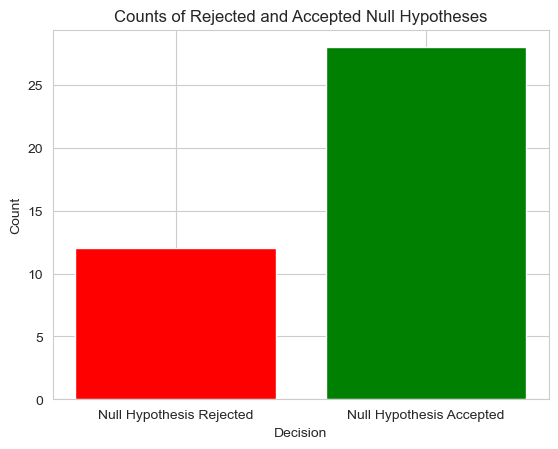

In [43]:
# Count the number of rejected and accepted null hypotheses
rejected_count = sum(decision == "Null Hypothesis Rejected 🚫" for decision in decisions)
accepted_count = sum(decision == "Failed to Reject Null Hypothesis ✅" for decision in decisions)

# Display the counts
print(f"Number of Null Hypotheses Rejected: {rejected_count}")
print(f"Number of Null Hypotheses Accepted: {accepted_count}")

# Data for plotting
decisions = ["Null Hypothesis Rejected 🚫"] * rejected_count + ["Failed to Reject Null Hypothesis ✅"] * accepted_count
counts = [rejected_count, accepted_count]
labels = ["Null Hypothesis Rejected", "Null Hypothesis Accepted"]

# Create a bar plot
plt.bar(labels, counts, color=['red', 'green'])
plt.xlabel('Decision')
plt.ylabel('Count')
plt.title('Counts of Rejected and Accepted Null Hypotheses')
plt.show()